In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


filter_families = None
results = np.load(f"results/results_filter-{filter_families}.npy", allow_pickle=True).item()

In [3]:
avg_results = np.array([np.array([result[0] for result in results[bench]]).mean(0) for bench in results.keys()])
avg_results.shape #[:,-4]

(8, 11)

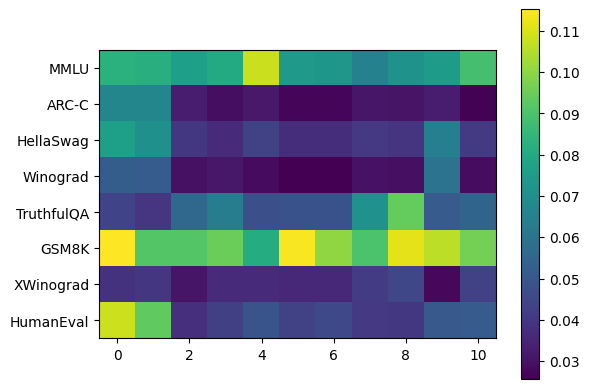

In [4]:
plt.imshow(avg_results)
plt.gca().set_yticks(np.arange(len(results.keys())))
plt.gca().set_yticklabels(results.keys())
plt.colorbar()
plt.show()

In [5]:
avg_results.shape

(8, 11)

In [6]:
np.array(avg_results[:6]).mean(0)

array([0.07277768, 0.06702859, 0.05432785, 0.05594334, 0.05655027,
       0.05435281, 0.05188864, 0.05454363, 0.06271689, 0.0649027 ,
       0.05600971])

In [7]:
np.median(np.array(avg_results)[:6], 0)

array([0.07141279, 0.06871591, 0.04807239, 0.04983494, 0.04517025,
       0.04283577, 0.04281434, 0.05274331, 0.05552061, 0.06197089,
       0.04782822])

Checking Misha's idea of predicting one benchmark from the others

In [12]:
results['MMLU'][0]

([0.08564362360788391,
  0.04536805062038646,
  0.023009027322897058,
  0.023627898588382552,
  0.17659370090426468,
  0.013590272479665905,
  0.018856592418551976,
  0.07323127004486173,
  0.07234680831134095,
  0.024657538210545983,
  0.12415273026134745],
 'BLOOM',
 [array([0.25677386, 0.27513063, 0.30275447, 0.59136918]),
  array([0.25559673, 0.26822214, 0.28523301, 0.45351971]),
  array([0.25270851, 0.25275817, 0.25282572, 0.25362039]),
  array([0.24492371, 0.25111441, 0.25998781, 0.36366881]),
  array([0.25263164, 0.25263465, 0.25271934, 0.97749173]),
  array([0.25345185, 0.25471947, 0.25727934, 0.33294305]),
  array([0.25278646, 0.2530262 , 0.25351218, 0.26919767]),
  array([0.28130861, 0.2982421 , 0.31984006, 0.49748319]),
  array([0.25176185, 0.26660099, 0.28987561, 0.55457841]),
  array([0.24943839, 0.2503676 , 0.25121892, 0.25429383]),
  array([0.27057333, 0.29235689, 0.32912243, 0.70850715])],
 array([0.26702148, 0.26592509, 0.26246222, 0.30854009]))

In [14]:
y = [np.array([result[3] for result in results[bench]]).mean(0) for bench in results.keys()]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (25,) + inhomogeneous part.

In [135]:
bench='MMLU'

In [136]:
results = {}
for filter_families in [False,True]:
    results[filter_families] = np.load(f"results/results_filter-{filter_families}.npy", allow_pickle=True).item()
models = [m[0] for m in results[True][bench]]
models

['CodeLlama',
 'Codegen',
 'DeepSeek-Coder',
 'Falcon',
 'Gemma',
 'Llama',
 'Llama-2',
 'Llama-3',
 'MPT',
 'OpenLlama',
 'OpenLlamaV2',
 'Phi',
 'Qwen',
 'Qwen1.5',
 'RedPajama-INCITE-Base',
 'StarCoder2',
 'Yi',
 'Yi-200K']

In [141]:
delta = np.array([m[1] for m in results[False][bench] if m[0] in models])-np.array([m[1] for m in results[True][bench] if m[0] in models])

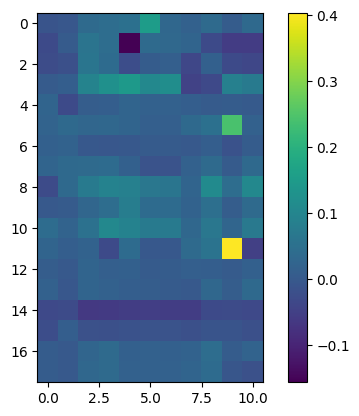

In [143]:
plt.imshow(delta)
plt.colorbar()

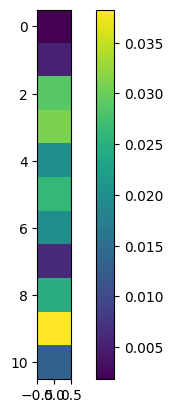

In [146]:
plt.imshow(delta.mean(0).reshape(-1,1))
plt.colorbar()

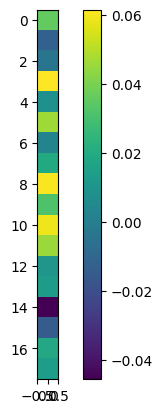

In [147]:
plt.imshow(delta.mean(1).reshape(-1,1))
plt.colorbar()

In [4]:
data = pd.read_csv('data/base_llm_benchmark_eval.csv')

In [5]:
data.shape

(107, 13)

In [7]:
data.columns

Index(['Model', 'Model Family', 'Model Size (B)', 'Pretraining Data Size (T)',
       'FLOPs (1E21)', 'MMLU', 'ARC-C', 'HellaSwag', 'Winograd', 'TruthfulQA',
       'GSM8K', 'XWinograd', 'HumanEval'],
      dtype='object')

In [9]:
bench = 'MMLU'

In [21]:
def logit(p, eps=.001):
    return np.log((eps+p)/(1-p+eps))

In [22]:
logit(data[bench])

0     -0.248938
1      0.173602
2      0.837437
3     -0.587457
4     -0.095458
         ...   
102   -0.990885
103   -0.958060
104   -1.000622
105   -1.046878
106   -0.735928
Name: MMLU, Length: 107, dtype: float64

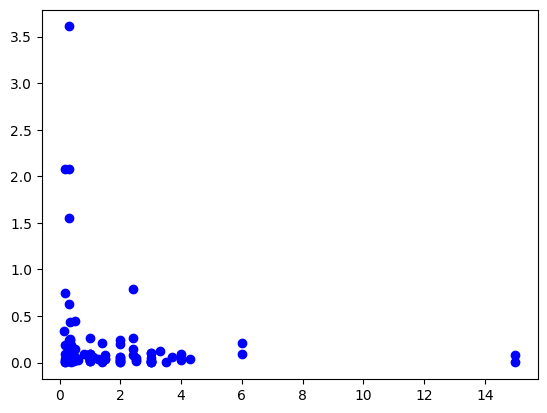

In [24]:
plt.plot(data['Pretraining Data Size (T)'], data[bench]/data['Model Size (B)'], 'bo')
plt.show()

0       7.0
1      13.0
2      70.0
3       6.7
4      13.0
       ... 
102     3.0
103     7.0
104     7.0
105     6.0
106    16.0
Name: Model Size (B), Length: 107, dtype: float64

In [6]:
data

,Model,Model Family,Model Size (B),Pretraining Data Size (T),FLOPs (1E21),MMLU,ARC-C,HellaSwag,Winograd,TruthfulQA,GSM8K,XWinograd,HumanEval
0,meta-llama/Llama-2-7b-hf,Llama-2,7.0,2.000,84.000,0.437961,0.530717,0.777435,0.740331,0.389802,0.144807,0.754881,0.128049
1,meta-llama/Llama-2-13b-hf,Llama-2,13.0,2.000,156.000,0.543378,0.581058,0.809699,0.766377,0.341724,0.228203,0.786798,0.182927
2,meta-llama/Llama-2-70b-hf,Llama-2,70.0,2.000,840.000,0.698321,0.673208,0.873332,0.837411,0.449235,0.540561,0.824453,0.298780
3,huggyllama/llama-7b,Llama,6.7,1.000,40.200,0.356933,0.509386,0.778132,0.714286,0.343279,0.080364,0.693204,0.128049
4,huggyllama/llama-13b,Llama,13.0,1.000,78.000,0.476106,0.561433,0.809201,0.762431,0.394789,0.075815,0.730362,0.158537
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,togethercomputer/RedPajama-INCITE-Base-3B-v1,RedPajama-INCITE-Base,3.0,0.800,14.400,0.270279,0.401877,0.647680,0.647198,0.332349,0.012889,NaN,NaN
103,togethercomputer/RedPajama-INCITE-Base-7B-v0.1,RedPajama-INCITE-Base,7.0,1.000,42.000,0.276821,0.462457,0.716292,0.673244,0.330348,0.015921,NaN,NaN
104,LLM360/Amber,Amber,7.0,1.259,52.878,0.268357,0.409556,0.737901,0.678769,0.335564,0.028052,NaN,NaN
105,Salesforce/codegen-6B-nl,Codegen,6.0,0.360,12.960,0.259345,0.423208,0.685919,0.664562,0.344705,0.021986,NaN,NaN


In [99]:
data = pd.read_csv('data/base_llm_benchmark_eval.csv')
df = data[['Model Family','Pretraining Data Size (T)']].groupby('Model Family').max()
df.loc[df['Pretraining Data Size (T)']<=.5]

,Pretraining Data Size (T)
Model Family,
BLOOM,0.366
Codegen,0.360
GPT-Neo/J,0.472
OPT,0.180
Pythia,0.300
XGLM,0.500


In [100]:
#data['Pretraining Data Size (T)'] = (data['Pretraining Data Size (T)']-data['Pretraining Data Size (T)'].mean())/data['Pretraining Data Size (T)'].std()
#data['Model Size (B)'] = (data['Model Size (B)']-data['Model Size (B)'].mean())/data['Model Size (B)'].std()

bad_families = ['XGLM','OPT','StarCoder','StableLM','Pythia','GPT-Neo/J','BLOOM']
data = data.loc[[f in bad_families for f in data['Model Family']]]

In [101]:
data

,Model,Model Family,Model Size (B),Pretraining Data Size (T),FLOPs (1E21),MMLU,ARC-C,HellaSwag,Winograd,TruthfulQA,GSM8K,XWinograd,HumanEval
31,EleutherAI/pythia-1b-deduped,Pythia,1.000,0.300,1.80000,0.242711,0.290956,0.496515,0.535912,0.389394,0.011372,0.560992,0.042683
32,EleutherAI/pythia-410m-deduped,Pythia,0.410,0.300,0.73800,0.259888,0.248294,0.412866,0.543804,0.409476,0.003033,0.536312,0.012195
33,EleutherAI/pythia-6.9b-deduped,Pythia,6.900,0.300,12.42000,0.264809,0.412969,0.670484,0.640884,0.351946,0.016679,0.652470,0.085366
34,EleutherAI/pythia-2.8b-deduped,Pythia,2.800,0.300,5.04000,0.267846,0.362628,0.606552,0.602210,0.355598,0.008340,0.639989,0.048780
35,EleutherAI/pythia-12b-deduped,Pythia,12.000,0.300,21.60000,0.256306,0.413823,0.702649,0.664562,0.329989,0.014405,0.682421,0.115854
36,EleutherAI/pythia-70m-deduped,Pythia,0.070,0.300,0.12600,0.252605,0.210751,0.271659,0.496448,0.475144,0.000000,0.510100,0.000000
37,EleutherAI/pythia-1.4b-deduped,Pythia,1.400,0.300,2.52000,0.255555,0.326792,0.549592,0.573007,0.386585,0.008340,0.594063,0.042683
38,EleutherAI/pythia-160m-deduped,Pythia,0.160,0.300,0.28800,0.248606,0.240614,0.313882,0.513812,0.443404,0.002274,0.523600,0.000000
39,bigscience/bloom-560m,BLOOM,0.560,0.341,1.14576,0.242154,0.247440,0.371540,0.519337,0.424443,0.003033,0.578552,0.006098
40,bigscience/bloom-1b1,BLOOM,1.100,0.341,2.25060,0.267021,0.283276,0.427803,0.550118,0.417972,0.002274,0.609513,0.000000
